# Analiza podatkov - pandas
Spodaj bom analiziral podatke s strani [anime-planet](https://www.anime-planet.com/anime/all) in preveril hipoteze, ki sem jih postavil:
* Kateri *žanri* so najbolj popularni?
* Kateri *studii* imajo največ najbolje ocenjenih filmov?
* Ali so anime z več *epizod* bolje ocenjeni?
* Kateri *studii* so izdali največ epizod?
* Ali imajo anime, ki so izšli kasneje več *epizod*?

Naprej si pripravimo vse, kar potrebujemo za obdelavo podatkov.

In [21]:
# Uvozimo knjižnico pandas
import pandas as pd
# Uvozimo knjižnico za risanje grafov
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
# Naložimo razpredelnice
anime = pd.read_csv('Csv_files/anime-planet.csv', index_col = 'id').sort_values('id', ascending=True)
tags = pd.read_csv('Csv_files/anime-planet_tags.csv', index_col = 'id').sort_values('id', ascending=True)
# Nastavimo, da nam pokaže le prvih 20 vrstic podatkov
pd.options.display.max_rows = 20


Rabili bomo tudi razpredelnico, ki združuje tako anime kot tags razpredelnico. Uporabimo 'merge' iz knjižnice pandas.

In [3]:
anime_tags = pd.merge(anime, tags, left_on='id', right_on='id')

Za lažjo predstavo, sem spodaj dal primer vsake razpredelnice.

In [4]:
anime.head(20)

,title,alt_title,type,num_of_ep,studio,year,rating
id,,,,,,,
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1
10,Prince of Tennis,No alternative title found,TV Series,178,Production I.G,2001,4.0
12,"Now and Then, Here and There","Ima, Soko ni Iru Boku",TV Series,13,AIC,1999,4.0
16,Akira,No alternative title found,Movie,1,TMS Entertainment,1988,4.1
20,Irresponsible Captain Tylor,Musekinin Kanchou Tylor,TV Series,26,Tatsunoko Production,1993,4.1
22,Naruto,No alternative title found,TV Series,220,Studio Pierrot,2002,4.0
23,Maison Ikkoku,No alternative title found,TV Series,96,Studio Deen,1986,4.1
26,Ranma 1/2,No alternative title found,TV Series,161,Studio Deen,1989,4.0
27,Jin-Roh: The Wolf Brigade,No alternative title found,Movie,1,Production I.G,2000,3.9


In [5]:
tags.head(20)

,tags
id,
6,Romance
6,Coming of Age
6,Original Work
6,Robots
6,Sci Fi
6,Action
6,Slapstick
6,Comedy
10,Sports


In [6]:
anime_tags.head(20)

,title,alt_title,type,num_of_ep,studio,year,rating,tags
id,,,,,,,,
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1,Romance
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1,Coming of Age
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1,Original Work
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1,Robots
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1,Sci Fi
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1,Action
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1,Slapstick
6,FLCL,Furi Kuri,OVA,6,Gainax,2000,4.1,Comedy
10,Prince of Tennis,No alternative title found,TV Series,178,Production I.G,2001,4.0,Sports


### Kateri *žanri* so najbolj popularni?


Tako, kot pri filmih si predstavljam, da bo najbolj popularen žaner Akcija (*Action*).

Da bomo lahko odgovorili na vprašanje, rabimo že pripravljeno razpredelnico anime_tags. Najprej se bomo omejili na oceno 4.5, nato združili po žanrih. Izrisali bomo graf in pogledali, kateri izmed žanrov je najbolj popularen.

In [7]:
žanri = anime_tags[anime_tags.rating >= 4.5].groupby('tags').size().sort_values(ascending=False).head(20)

Text(0, 0.5, 'Število pojavitev')

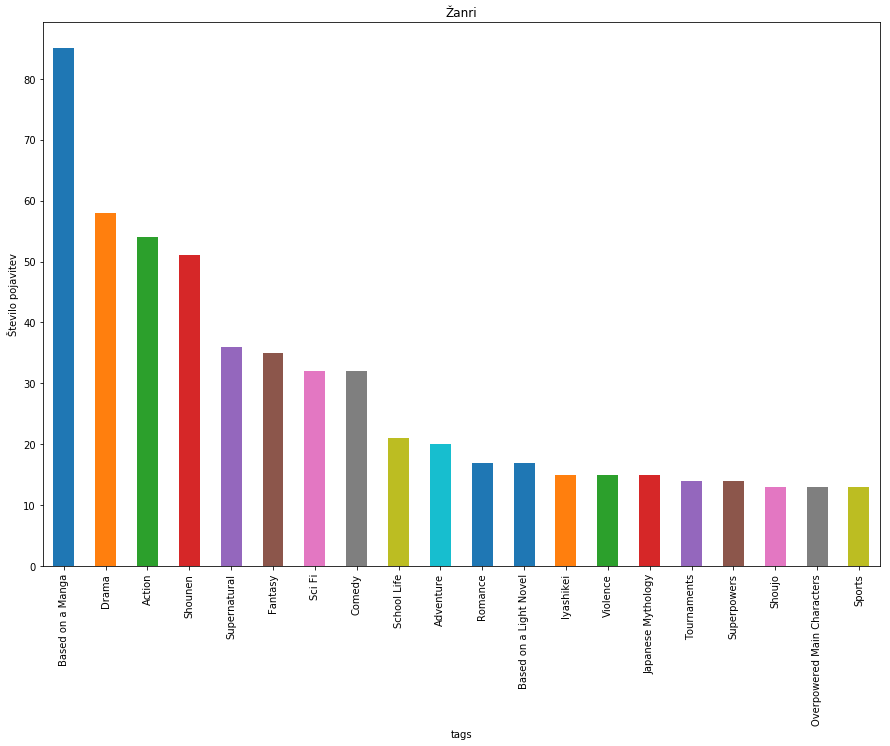

In [22]:
žanri.plot.bar()
plt.title('Žanri')
plt.ylabel('Število pojavitev')

Opazimo, da se žanr **Based on a Manga** *(prevod: Temelji na Mangi)* največkrat pojavi. To je logično, ker je originalno vsak anime izhajal iz mange, tako da ne moremo reči, da je najbolj popularen. Zato lahko rečemo, da je najbolj popularen žanr Drama. Osebno nisem najbolj navdušen nad takim žanrom, zato raje gledam Action anime, ki je na tej lestvici na tretjem mestu.

*Opomba: Manga so stripi, ki izhajajo iz Japonske.*

### Kateri *studii* imajo največ najbolje ocenjenih filmov oz. anime?

Za to vprašanje bomo morali razpredelnico anime pogrupirati po studiih. Odločil sem se, da pogledam vse animirane filme oz. anime, ki imajo oceno več kot *4.6*.

In [9]:
studii_6 = anime[anime.rating >= 4.6].groupby('studio').size().sort_values(ascending=False)
studii_6

studio
BN Pictures                5
Sunrise                    5
MADHOUSE                   4
Shaft                      4
Production I.G             3
Bones                      3
Kyoto Animation            3
Artland                    2
Shuka                      2
Studio Ghibli              2
No studio found            1
Studio Chizu               1
Kinema Citrus              1
G.CMay Animation & Film    1
David Production           1
CoMix Wave Inc.            1
Brain's Base               1
Studio Deen                1
WHITE FOX                  1
dtype: int64

In [10]:
vsi_studii = anime.groupby('studio').size()
len(vsi_studii)

133

Tu sem izračunal, koliko je vseh studiev na razpolago v tej analizi. To sem naredil, da boste lahko malo dobili občutek, kako težko je dobiti dobre ocene.

Text(0, 0.5, 'Število anime z dobro oceno')

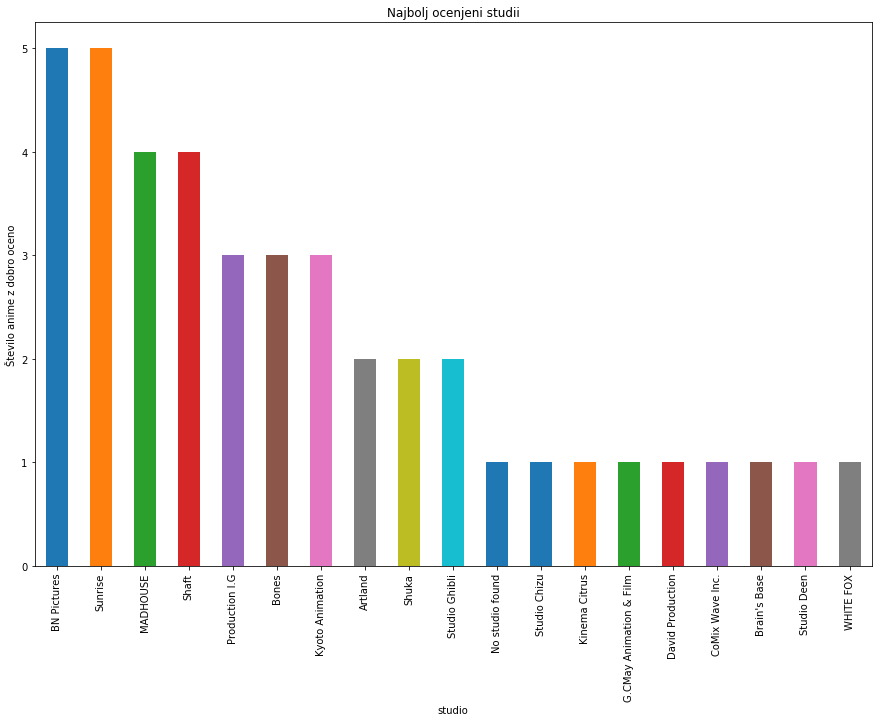

In [23]:
studii_6.plot.bar()
plt.title('Najbolj ocenjeni studii')
plt.ylabel('Število anime z dobro oceno')

Če se malo spoznaš na anime in njihovo industrijo, vidiš da so na vrhu sami znani studii. Presenetilo me je, da studio MADHOUSE ni na prvem mestu, ker je zelo poznan studio in je izdajal epizode nekaj najbolj znanih anime. Zanimivo je tudi, da od vseh 133 studiov, je le 19 studiov, ki so izdajali anime z oceno višjo od 4.6.
Poglejmo si, kako bi podatki izgledali, če znižam oceno za 0.1.

In [12]:
studii_5 = anime[anime.rating >= 4.5].groupby('studio').size().sort_values(ascending=False)
studii_5

studio
MADHOUSE              15
Production I.G         9
Sunrise                8
J.C. Staff             8
A-1 Pictures           7
Artland                7
BN Pictures            6
Brain's Base           6
Bones                  6
Shaft                  5
                      ..
Frederator Studios     1
No studio found        1
Gainax                 1
Lerche                 1
P.A. Works             1
Studio Hibari          1
Studio Khara           1
Tezuka Productions     1
Toei Animation         1
8-Bit                  1
Length: 34, dtype: int64

Text(0, 0.5, 'Število anime z dobro oceno')

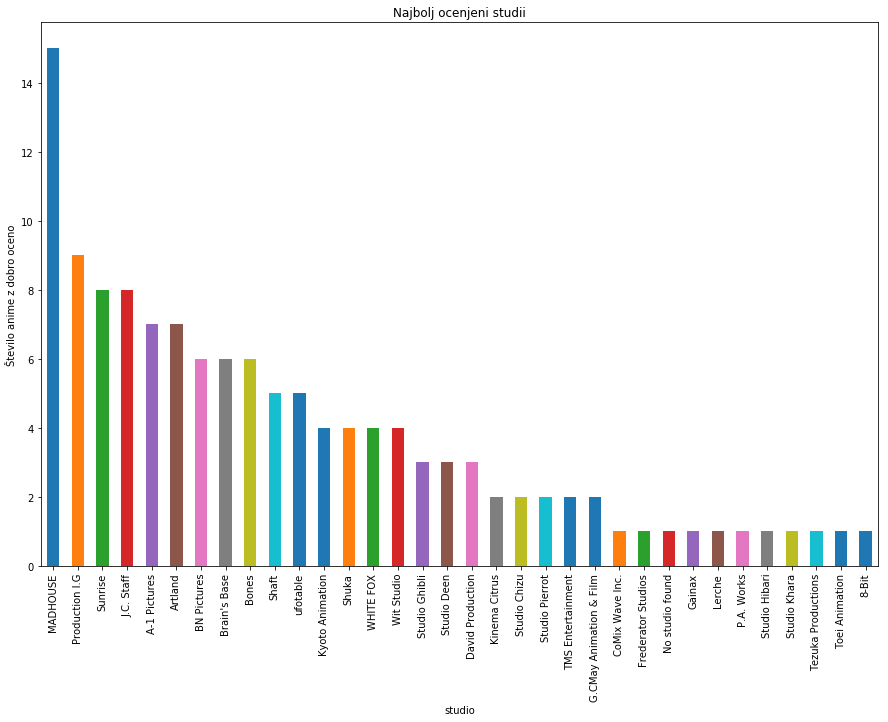

In [24]:
studii_5.plot.bar()
plt.title('Najbolj ocenjeni studii')
plt.ylabel('Število anime z dobro oceno')

Vidimo, da se je število studiov na grafu povečalo za 15, kar še vedno ni veliko v primerjavi s številom vseh studiov.
Na grafu se tudi vidi, da je bil moj šok upravičen pri prejšnem grafu. Tukaj je studio MADHOUSE preprečirljivo prevzelo vodstvo.

### Ali so anime z več *epizod* bolje ocenjeni?

Ponavadi so anime z več epizodami slabše ocenjene, ker se vičino ljudi sproti naveliča gledati epizode, zato jim dajo slabše ocene.

Da bomo to preverili bomo rabili razpredelnico anime. Pogrupirali jo bomo po število epizod in nato izrisali v odvisnosti od ocene. Ker so anime z več od 300 epizodami samo štrije, sem se omejil na število epizod manjše od 300, da bo graf bolj pregleden.

4.177533333333334

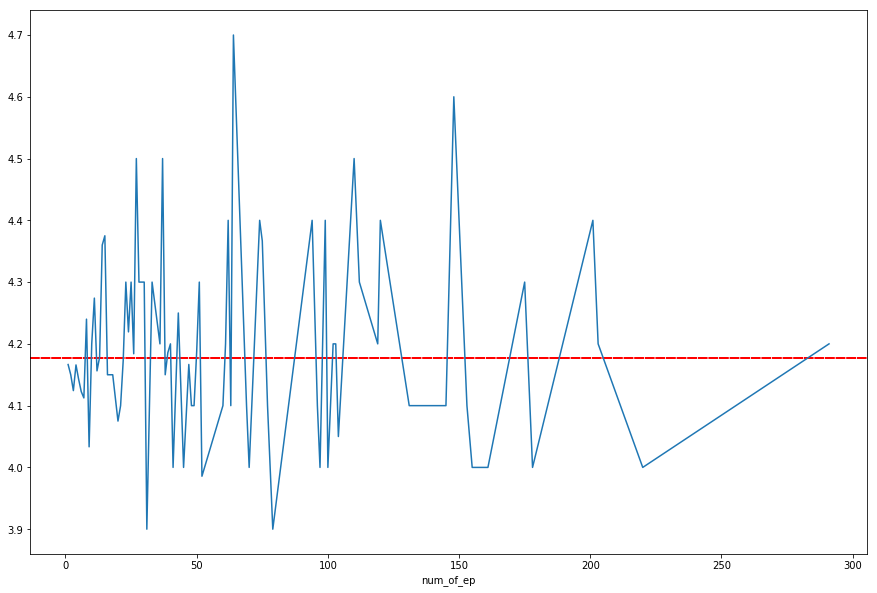

In [25]:
anime[anime.num_of_ep < 300].groupby('num_of_ep').rating.mean().plot()
plt.axhspan(ymin=anime.rating.mean(), ymax=anime.rating.mean(), color='r', linestyle='dashed', linewidth=2)
anime.rating.mean()

Ko vidimo graf, lahko sklepamo da ne moremo reči, da več kot je epizod, slabša ali boljša ocena je. Nekateri anime so boljše ocenjeni kot drugi, ne glede na to kako dolg je. Vnedar se pa vidi blag padec, ko gremo čez 250 epizod. Opazimo tudi lahko, da so v popvrečju najbolj ocenjeni anime, ki so dolgi od 20 - 40 epizod, ker so skoraj vse ocene v tem območju nad povprečjem.

### Kateri *studii* so izdali največ epizod?

Odgovor na to vprašanje bi lahko sklepali že iz prejšnega vprašanja. Lahko rečemo, da bomo spet videli skoraj iste studie na vrhu. Pa prevermio, če je temu res tako.

In [15]:
št_epizod = anime[['studio', 'num_of_ep']].groupby('studio').num_of_ep.sum().sort_values(ascending=False).head(20)
št_epizod

studio
Toei Animation       1870
Studio Pierrot       1850
MADHOUSE             1737
TMS Entertainment    1708
Sunrise              1290
Studio Deen          1178
J.C. Staff           1114
A-1 Pictures          891
Production I.G        886
Bones                 674
Artland               428
Kyoto Animation       424
Gallop                400
Satelight             394
No studio found       391
Nippon Animation      352
Shaft                 334
GONZO                 330
Brain's Base          253
AIC                   190
Name: num_of_ep, dtype: int64

Spet opazimo, da so na vrhu sami poznani studii. Preseneča me, da na vrhu ni studio MADHOUSE, ker kot smo pri prejšnem vprašanju videli, MADHOUSE izdaja same dobro ocenjene anime in verjamem da jih je kar veliko čez 12 spizod.

Text(0, 0.5, '')

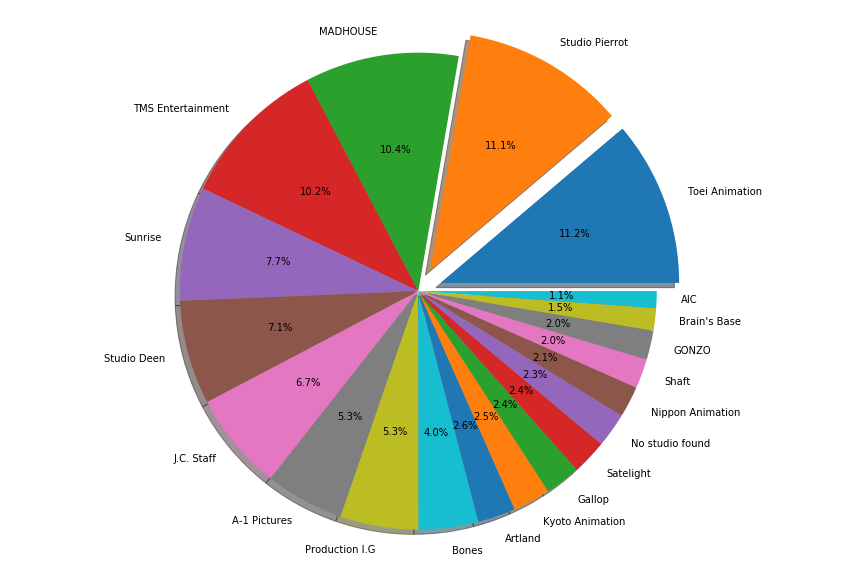

In [26]:
št_epizod.plot.pie(explode=(0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.ylabel('')

Na tem grafu se vidi, kateri studii so najbolj uspešni, ker seveda več epizod izdaš več denarja dobiš, večjo možnost imaš da si popularen in te bodo drugi iskali, da izdaš anime, ki bi izhajali iz njihovih mang in tako naprej.

### Ali imajo anime, ki so izšli kasneje več *episod*?

Uporabili bomo razpredelnico anime.
Najprej bomo pogledali, v katerih letih je izšlo največ anime filmov.

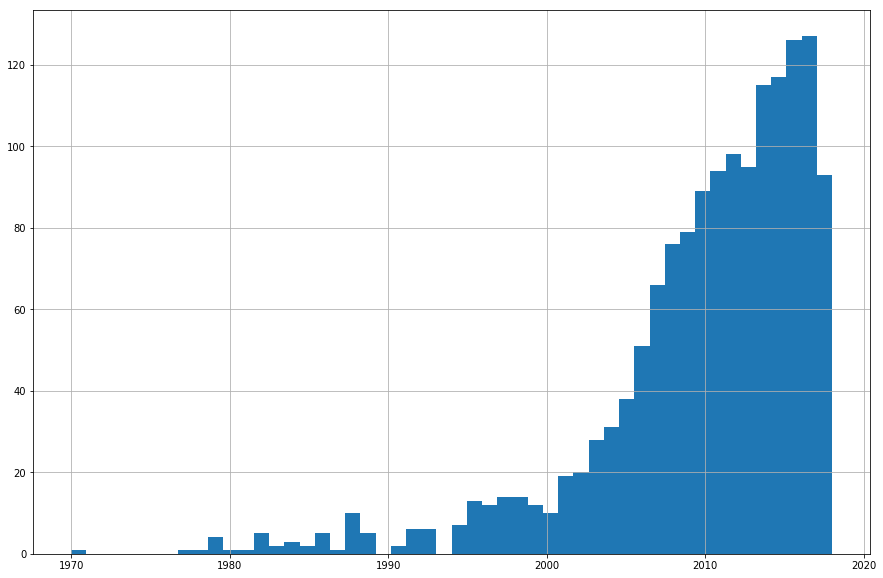

In [27]:
anime.year.hist(bins=50)

Kot opazimo, so na veliko začeli delati in izdajati anime šele okrog leta 2010. Poglejmo si sedaj kdaj so izhajali anime, z največ epizodami.

14.711333333333334

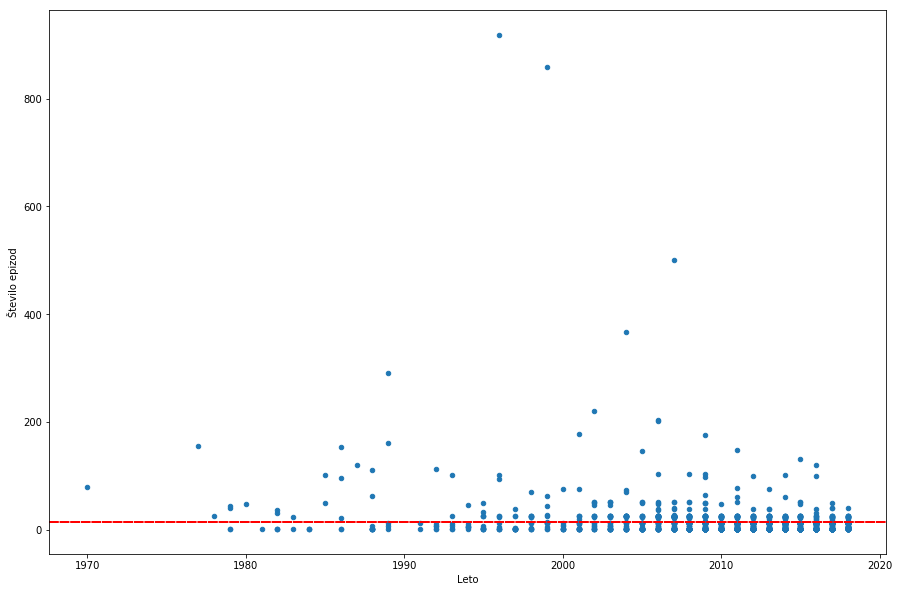

In [28]:
anime.plot.scatter('year', 'num_of_ep')
plt.axhspan(ymin=anime.num_of_ep.mean(), ymax=anime.num_of_ep.mean(), color='r', linestyle='dashed', linewidth=2)
plt.ylabel('Število epizod')
plt.xlabel('Leto')
anime.num_of_ep.mean()

Na grafu se vidi, da so anime z več epizodami izdajali okrog leta 2005 - 2006, ampak to je zelo groba ocena. Vidimo, da sta anime z največ epizodami izšla med leti od 1995 do 2000, kar ni presenetljivo. Novejšni anime so vedno od 12 do 24 episod dolgi. Sicer obstajajo taki anime, ki bodo v prihodnosti imeli več epizod, ampak so šele začeli izhajati.

Rdeča črta predstavlja povprečje episod. Je blizu 12, kar je logično, ker je večino anime dolgih 12 epizod.

Vidimo tudi, da so pike zelo zgoščene okrog leta 2010, kar še bolj potrjuje, da so začeli na veliko izdajati anime okrog omenjenega leta.

### Tipi anime

Za konec si še poglejmo, koliko je katerih tipov anime.

In [19]:
type_size = anime.groupby('type').size().sort_values(ascending=False)

Text(0, 0.5, '')

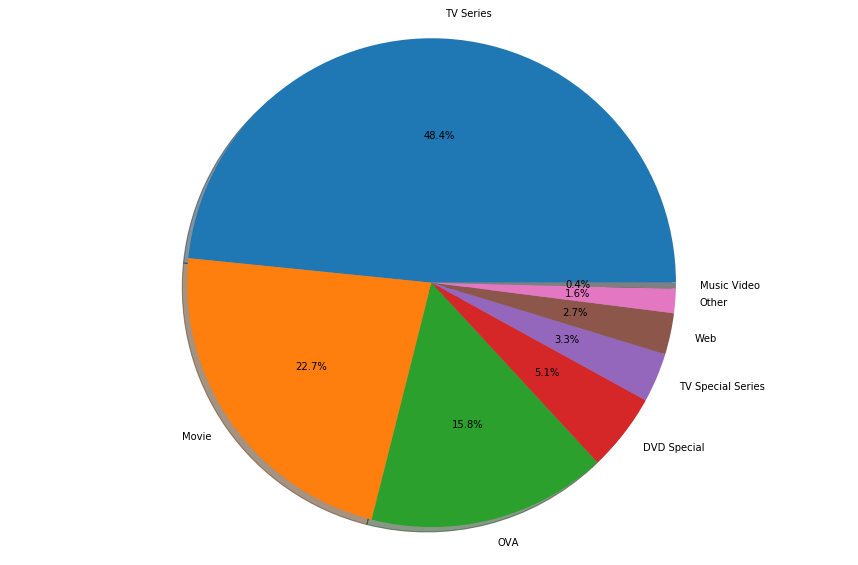

In [29]:
type_size.plot.pie(autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.ylabel('')

Kot vidimo je največ Tv serij in nato filmov. To sem tudi pričakoval. Po tem so OVA. OVA je nadaljevanje Tv serij in ponavadi jih izdajo po vsaki zaključeni seriji. Ostalih tipov je zelo malo.

### Zaključek

V analizi sem obdelal podatke. Najprej sem dotaknil žanrov, nato sem pregledal popularnost studiov, potem sem še analiziral ocene anime v različnih pogledih. Za konec sem še pogledal koliko je katerih tipov anime.

Ker sem sam navdušenec anime, sem analizo delal z užitkom in iz nje tudi izvedel nekaj zanimivih podatkov.